# **Praevidens**
#### Término Latino que significa "El que ve antes” o “El que preveé”
#### Sistema de Predicción de Riesgo Laboral.

# **Introducción**

---


La OSHA (Administración de Seguridad y Salud Ocupacional de Estados Unidos) recopila datos sobre muertes, lesiones y enfermedades laborales de establecimientos que cumplen con las especificaciones de la industria y diligencian los formularios 300 y 300A; a través de la Aplicación de Seguimiento de Lesiones (ITA).

Se obtiene el Dataset en OSHA con información del 2024.

In [1]:
#Importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [6]:
Dataset = pd.read_csv ("/content/Proyecto/ITA 300A Summary Data 2024 through 04-30-2025 FN.csv",sep=';',low_memory=False)


# **Análisis Exploratorio**

---



In [3]:
#Dataset Primeras 5 Instancias

Dataset.head()

,id,establishment_name,establishment_id,ein,company_name,street_address,city,state,zip_code,naics_code,...,total_respiratory_conditions,total_poisonings,total_hearing_loss,total_other_illnesses,created_timestamp,change_reason,year_filing_for,sector,zipcode,naics_char
0,2808362,AristaCare at Meadow Springs,41940,204755042,AristaCare at Meadow Springs LLC,845 Germantown Pike,Plymouth Meeting,PA,19462.0,623110.0,...,0.0,0.0,0.0,0.0,28FEB25:16:35:00,NaN,2024.0,Health Care and Social Assistance,19462.0,623110.0
1,2587120,AM Braswell Jr. Food Company,41942,580667528,AM Braswell Jr. Food Company,226 North Zetterower Avenue,Statesboro,GA,30458.0,311421.0,...,0.0,0.0,0.0,1.0,31JAN25:20:24:00,NaN,2024.0,Manufacturing,30458.0,311421.0
2,2575264,"SMM Group Chesapeake, VA",41952,453807558,Sims Metal Management,4300 Buell Street,Chesapeake,VA,23324.0,423930.0,...,0.0,0.0,0.0,0.0,29JAN25:14:47:00,NaN,2024.0,Wholesale Trade,23324.0,423930.0
3,2575218,"SMM Group Richmond, VA",41955,453807558,Sims Metal Management,3220 Deepwater Terminal Road,Richmond,VA,23234.0,423930.0,...,0.0,0.0,0.0,0.0,29JAN25:14:31:00,NaN,2024.0,Wholesale Trade,23234.0,423930.0
4,2505064,FRP Sheet Metal Contracting Corp,41983,112459740,FRP Sheet Metal Contracting Corp,365 Wyandanch Ave.,West Babylon,NY,11704.0,238220.0,...,0.0,0.0,0.0,0.0,07JAN25:20:06:00,NaN,2024.0,Construction,11704.0,238220.0


In [4]:
Dataset.sample(5)

,id,establishment_name,establishment_id,ein,company_name,street_address,city,state,zip_code,naics_code,...,total_respiratory_conditions,total_poisonings,total_hearing_loss,total_other_illnesses,created_timestamp,change_reason,year_filing_for,sector,zipcode,naics_char
158695,2505847,Tulsa Levare US Inc,1072417,261626794,Borets US Inc,"1600 N Garnett rd, Tulsa, OK 74116",Tulsa,OK,74116.0,333914.0,...,0.0,0.0,0.0,0.0,08JAN25:13:43:00,NaN,2024.0,Manufacturing,74116.0,333914.0
137731,2726839,"""MARQUETTE MI - 3510""",1002346,390989248,"""Menards""","""3445 US HWY 41 WEST""",MARQUETTE,MI,49855.0,444110.0,...,0.0,0.0,0.0,0.0,24FEB25:21:43:00,NaN,2024.0,Retail Trade,49855.0,444110.0
43461,2669851,Cainhoy Elementary School,408784,576000313,Berkeley County School District,2424 Cainhoy Rd,Huger,SC,29450.0,611110.0,...,0.0,0.0,0.0,0.0,14FEB25:21:13:00,NaN,2024.0,Educational Services,29450.0,611110.0
157563,2546463,NORTHERN POWER DELIVERY,1070284,540418825,Dominion Energy,4600 12TH STREET EXTENSION,WEST COLUMBIA,SC,29172.0,221122.0,...,0.0,0.0,0.0,0.0,22JAN25:19:16:00,0,2024.0,Utilities,29172.0,221122.0
203395,2642925,MARCO ISLAND_1371806,1164278,417600000,US Postal Service,600 E ELKCAM CIR,MARCO ISLAND,FL,34145.0,491110.0,...,0.0,0.0,0.0,0.0,10FEB25:19:39:00,NaN,2024.0,Transportation and Warehousing,34145.0,491110.0


In [7]:
#389.874 Instancias y 35 Features
Dataset.shape


(389874, 35)

Este Conjuto de Datos tiene **389.874** Instancias y **35** Features

In [8]:
#Tipo de Features
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389874 entries, 0 to 389873
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            389874 non-null  object 
 1   establishment_name            389874 non-null  object 
 2   establishment_id              389874 non-null  int64  
 3   ein                           347436 non-null  object 
 4   company_name                  370747 non-null  object 
 5   street_address                389872 non-null  object 
 6   city                          389872 non-null  object 
 7   state                         389874 non-null  object 
 8   zip_code                      389874 non-null  int64  
 9   naics_code                    389874 non-null  int64  
 10  naics_year                    389874 non-null  int64  
 11  industry_description          363923 non-null  object 
 12  establishment_type            389324 non-nul

Este Conjuto de Datos tiene **4 Tipo decimal** (float64), **20 Tipos Enteros** (int64)  y **11 Tipos Objeto**  (Object)

#### **Valores Features Relevantes en Ceros**
Consistencia de Features relevantes para Calcular Risk Index.

Los Features annual_average_employees o total_hours_worked serán usados para el calculo del Risk Index y no deben contener ceros.

In [9]:
Empleados = (Dataset['annual_average_employees'] == 0).sum()
print(f"Cantidad de ceros en annual_average_employees: {Empleados}")

Horas = (Dataset['total_hours_worked'] == 0).sum()
print(f"Cantidad de ceros en total_hours_worked: {Horas}")

Cantidad de ceros en annual_average_employees: 1635
Cantidad de ceros en total_hours_worked: 1571


####**Descripción de Algunos Features**

---

**ein** = Identificación Fiscal del empleador simil NIT.

**naics_code** = Código del Sistema de Clasificación Industrial de América del
Norte (SCIAN) que clasifica el negocio de un establecimiento.

**naics_year** = Año calendario de la versión de los códigos NAICS.

**establishment_type** = Privado o Gobierno estatal o local.

Ingrese 1 si el establecimiento no es una entidad gubernamental.

Ingrese 2 si el establecimiento es una entidad del Gobierno Estatal.

Ingrese 3 si el establecimiento es una entidad del Gobierno Local.

**size** = Tamaño del establecimiento según número máximo de empleados que trabajaron allí durante el año.

1 < 20 empleados.

2 entre 20 y 249 empleados.
21 de 20 a 99.
22 de 100 a 249.

3 >= 250 o más empleados.

**annual_average_employees** = Número promedio anual de empleados en el establecimiento.

**total_hours_worked** = Total de horas trabajadas por todos los empleados.

**no_injuries_illnesses** =

1 si el establecimiento tuvo lesiones o enfermedades.

2 si el establecimiento NO tuvo lesiones o enfermedades.

**total_deaths** = Número total de fallecimientos.

**total_dafw_cases** = Número total de casos con días de ausencia del trabajo.

**total_djtr_cases** = Número total de casos con transferencia o restricción de trabajo.

**total_injuries** = Número total de lesiones.

##### **Gráficas de Features**

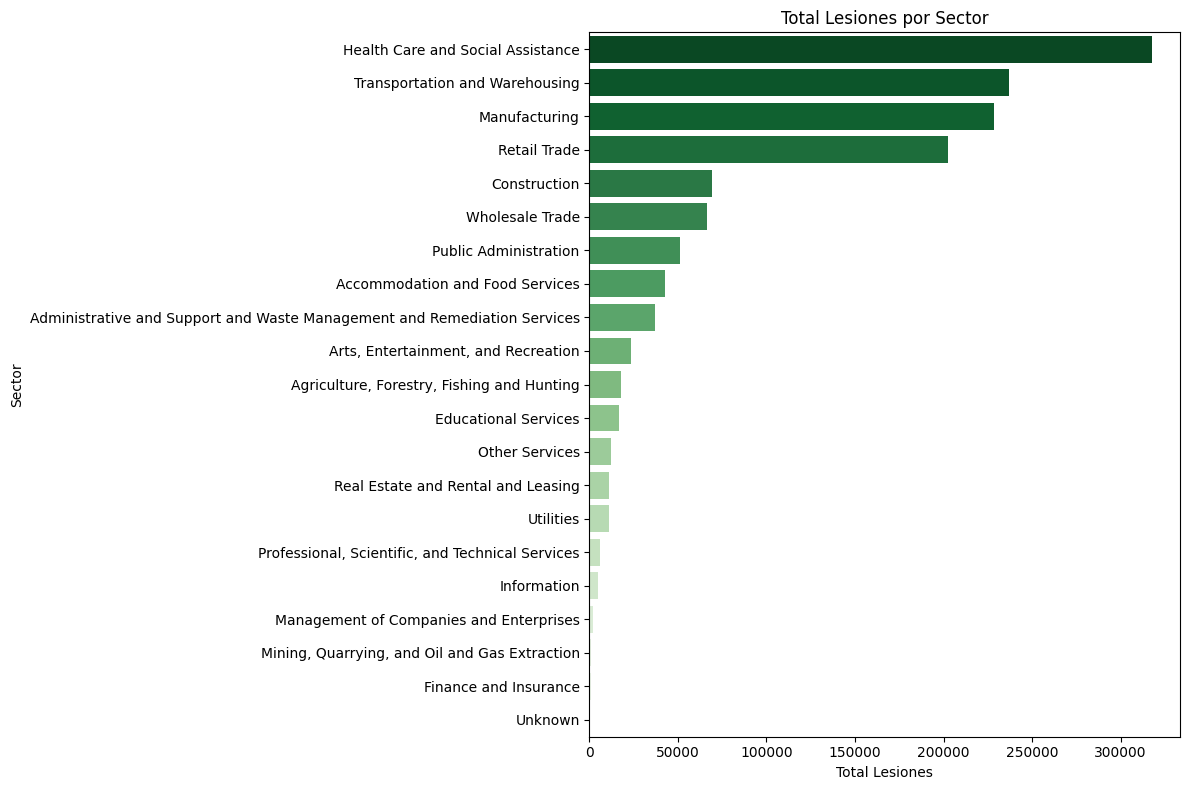

In [10]:
#Agrupar sector y sumar total_injuries
Injuries_Sector = Dataset.groupby("sector")["total_injuries"].sum().sort_values(ascending=False)

#Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(
    x=Injuries_Sector.values,
    y=Injuries_Sector.index,
    hue=Injuries_Sector.index,
    palette="Greens_r",
    dodge=False,
    legend=False
)
plt.xlabel("Total Lesiones")
plt.ylabel("Sector")
plt.title("Total Lesiones por Sector")
plt.tight_layout()
plt.show()

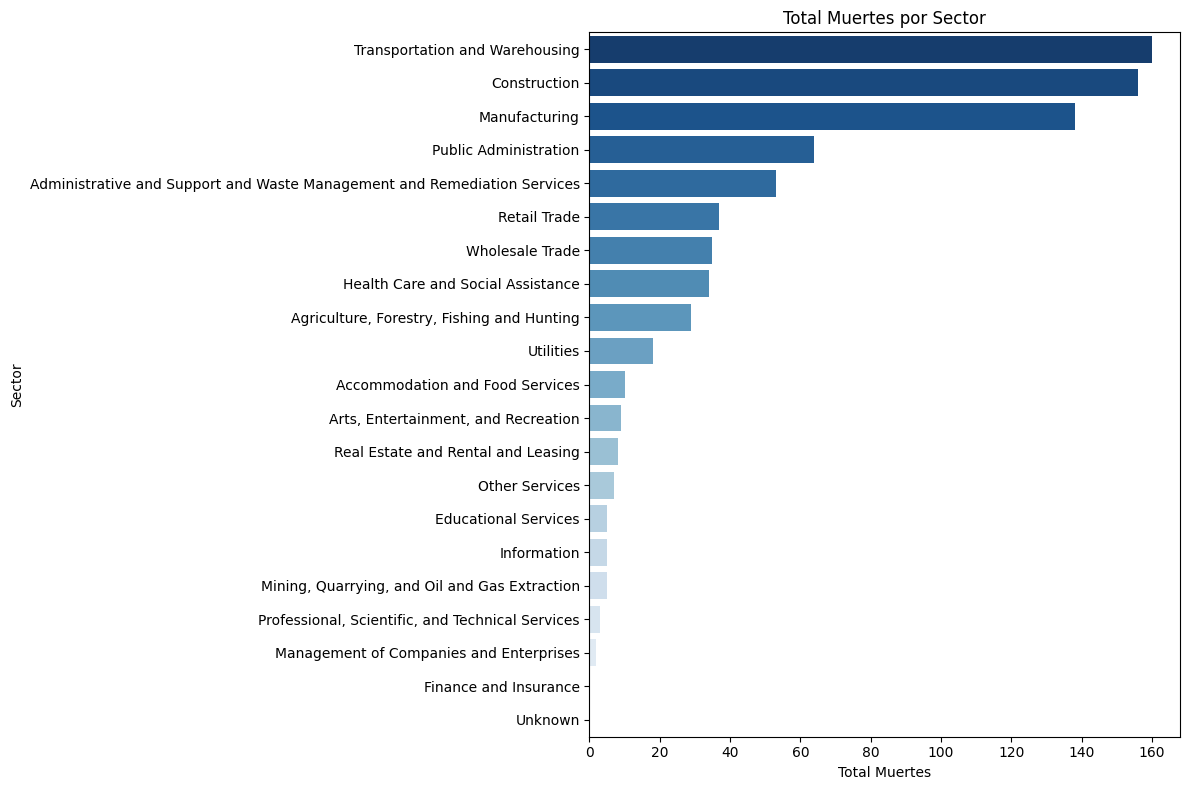

In [11]:
#Agrupar sector y sumar total_deaths
Deaths_Sector = Dataset.groupby("sector")["total_deaths"].sum().sort_values(ascending=False)

#Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(
    x=Deaths_Sector.values,
    y=Deaths_Sector.index,
    hue=Deaths_Sector.index,
    palette="Blues_r",
    dodge=False,
    legend=False
)
plt.xlabel("Total Muertes")
plt.ylabel("Sector")
plt.title("Total Muertes por Sector")
plt.tight_layout()
plt.show()

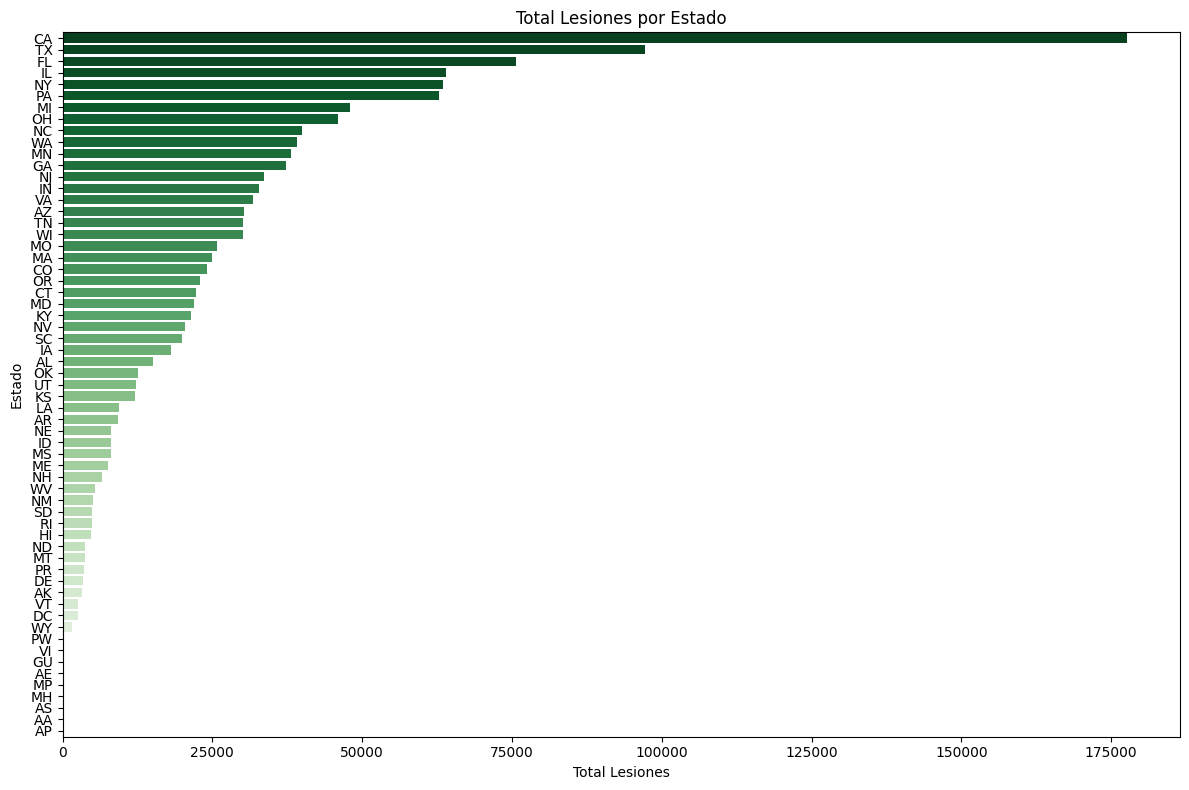

In [12]:
#Agrupar state y sumar total_injuries
Injuries_State = Dataset.groupby("state")["total_injuries"].sum().sort_values(ascending=False)

#Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(
    x=Injuries_State.values,
    y=Injuries_State.index,
    hue=Injuries_State.index,
    palette="Greens_r",
    dodge=False,
    legend=False
)
plt.xlabel("Total Lesiones")
plt.ylabel("Estado")
plt.title("Total Lesiones por Estado")
plt.tight_layout()
plt.show()

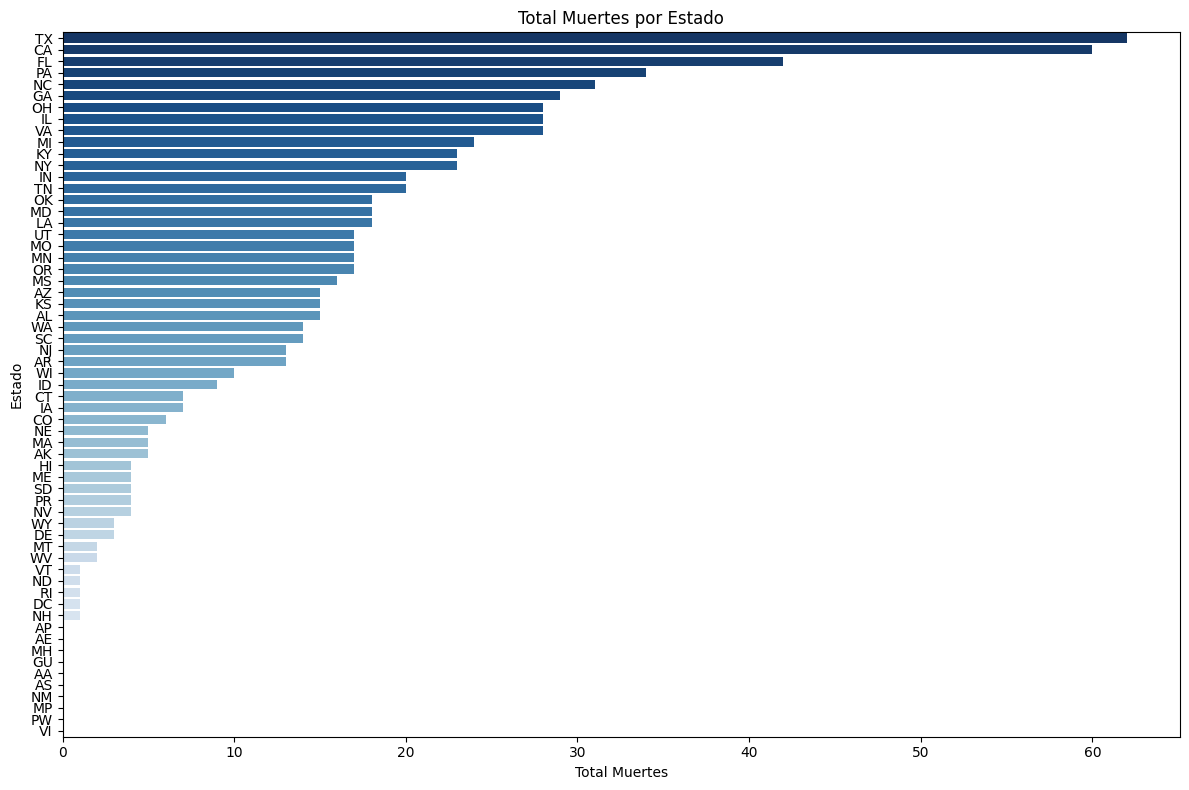

In [13]:
#Agrupar state y sumar total_deaths
Deaths_State = Dataset.groupby("state")["total_deaths"].sum().sort_values(ascending=False)

#Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(
    x=Deaths_State.values,
    y=Deaths_State.index,
    hue=Deaths_State.index,
    palette="Blues_r",
    dodge=False,
    legend=False
)
plt.xlabel("Total Muertes")
plt.ylabel("Estado")
plt.title("Total Muertes por Estado")
plt.tight_layout()
plt.show()

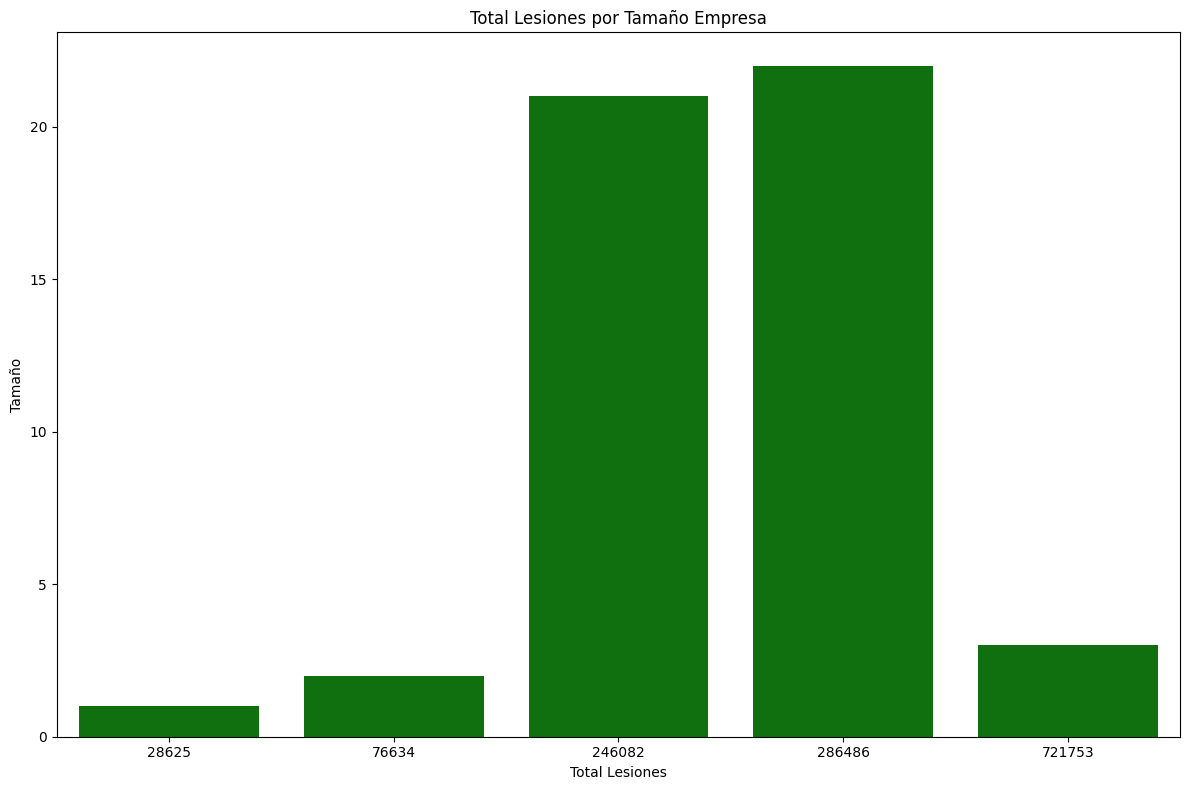

In [14]:
#Agrupar size y sumar total_injuries
Injuries_Size = Dataset.groupby("size")["total_injuries"].sum().sort_values(ascending=False)

#Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(
    x=Injuries_Size.values,
    y=Injuries_Size.index,
    color="Green",

)
plt.xlabel("Total Lesiones")
plt.ylabel("Tamaño")
plt.title("Total Lesiones por Tamaño Empresa")
plt.tight_layout()
plt.show()

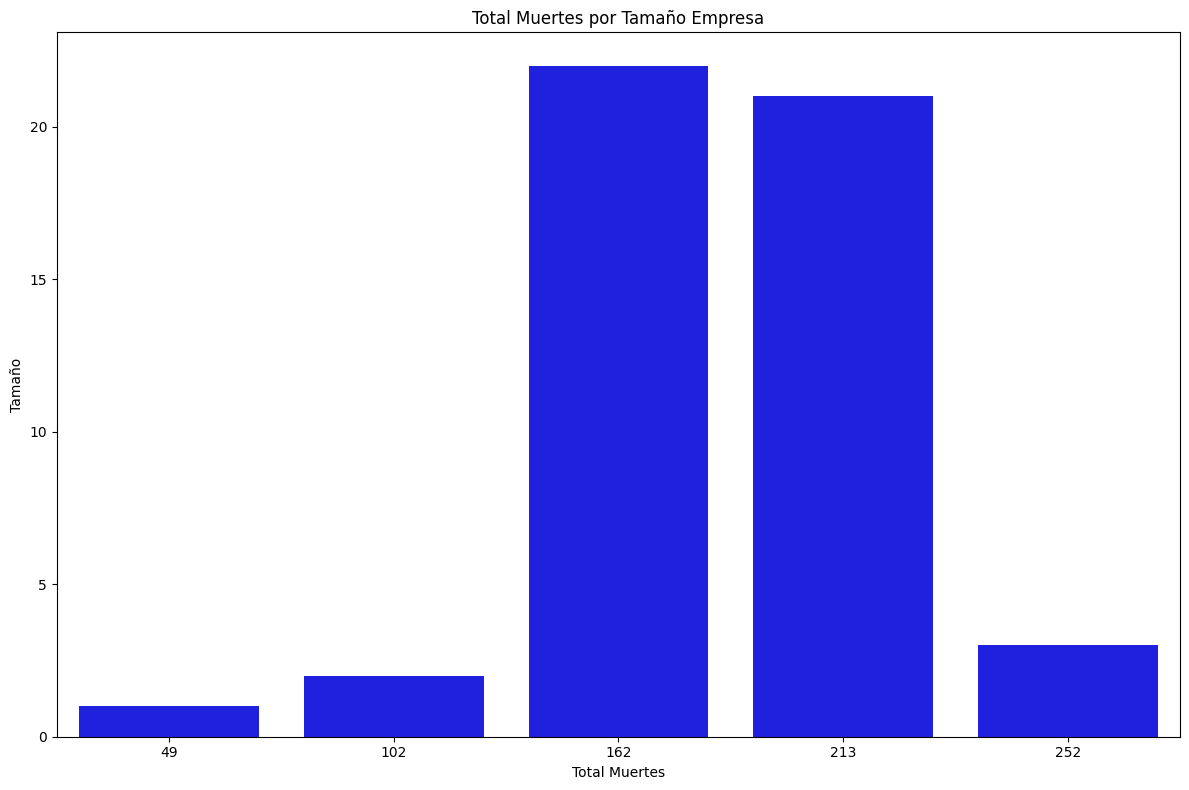

In [15]:
#Agrupar size y sumar total_deaths
Deaths_Size = Dataset.groupby("size")["total_deaths"].sum().sort_values(ascending=False)

#Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(
    x=Deaths_Size.values,
    y=Deaths_Size.index,
    color="Blue",

)
plt.xlabel("Total Muertes")
plt.ylabel("Tamaño")
plt.title("Total Muertes por Tamaño Empresa")
plt.tight_layout()
plt.show()

#####**Estadisticas básicas**

In [16]:
Dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
establishment_id,389874.0,1.022151e+06,3.753216e+05,41940.0,859535.25,1150900.5,1314571.75,1.415418e+06
zip_code,389874.0,5.198020e+04,2.877470e+04,0.0,29349.00,49336.0,77554.00,9.999900e+04
naics_code,389874.0,4.706611e+05,1.616860e+05,111110.0,333923.00,453310.0,561920.00,9.999990e+05
naics_year,389874.0,2.016656e+03,4.628629e+01,0.0,2012.00,2022.0,2022.00,2.022000e+03
establishment_type,389324.0,1.099154e+00,3.854133e-01,1.0,1.00,1.0,1.00,3.000000e+00
size,389874.0,1.293511e+01,9.678932e+00,1.0,2.00,21.0,21.00,2.200000e+01
annual_average_employees,389874.0,3.529126e+02,7.221301e+04,0.0,20.00,43.0,104.00,4.109260e+07
total_hours_worked,389874.0,5.043257e+05,5.956851e+07,0.0,24960.00,68887.0,177615.25,3.390406e+10
no_injuries_illnesses,389874.0,1.427110e+00,4.946591e-01,1.0,1.00,1.0,2.00,2.000000e+00
total_deaths,389874.0,1.995517e-03,4.821806e-02,0.0,0.00,0.0,0.00,6.000000e+00


####**Instancias Duplicadas**
___

No se debe hacer eliminación por instancias duplicadas.

In [17]:
Dataset.duplicated().sum()

np.int64(0)

####**Features a Descartar**
___

In [18]:
Dataset_Limpio = Dataset.copy()

#Features con más del 95% de Nulos
missing_threshold = 0.95
missing_pct = Dataset_Limpio.isnull().mean()
cols_muchos_nulos = missing_pct[missing_pct > missing_threshold].index.tolist()

#Features Númericos con Baja Varianza
from sklearn.feature_selection import VarianceThreshold

X_numeric = Dataset_Limpio.select_dtypes(include=["int64", "float64"])
selector = VarianceThreshold(threshold=0.001)  #Umbral
selector.fit(X_numeric)
low_variance_cols = X_numeric.columns[~selector.get_support()].tolist()

#Features Identificadores o Informativos
id_keywords = ['id', 'ein', 'name', 'address', 'timestamp', 'year']
cols_posiblemente_ids = [col for col in Dataset_Limpio.columns if any(k in col.lower() for k in id_keywords)]

#Features Duplicados
duplicated_cols = ["zipcode","naics_char"]

#Listado de Features para Eliminación
Para_Eliminar = list(set(cols_muchos_nulos + low_variance_cols + cols_posiblemente_ids + duplicated_cols))

# Mostrar sugerencias
print("Features con más del 95% de Nulos:")
print(cols_muchos_nulos, "\n")

print("Features con Baja Varianza:")
print(low_variance_cols, "\n")

print("Features Identificadores o Informativas:")
print(cols_posiblemente_ids, "\n")

print("Features Duplicados:")
print(duplicated_cols, "\n")

print("Eliminar los siguientes Features:")
print(Para_Eliminar)

Features con más del 95% de Nulos:
['change_reason'] 

Features con Baja Varianza:
['year_filing_for'] 

Features Identificadores o Informativas:
['id', 'establishment_name', 'establishment_id', 'ein', 'company_name', 'street_address', 'naics_year', 'created_timestamp', 'year_filing_for'] 

Features Duplicados:
['zipcode', 'naics_char'] 

Eliminar los siguientes Features:
['street_address', 'change_reason', 'naics_char', 'ein', 'company_name', 'year_filing_for', 'zipcode', 'id', 'establishment_id', 'created_timestamp', 'establishment_name', 'naics_year']


In [19]:
#Elimino Features NO Relevantes

Dataset_Limpio.drop(columns=Para_Eliminar, inplace=True)
Dataset_Limpio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389874 entries, 0 to 389873
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   city                          389872 non-null  object 
 1   state                         389874 non-null  object 
 2   zip_code                      389874 non-null  int64  
 3   naics_code                    389874 non-null  int64  
 4   industry_description          363923 non-null  object 
 5   establishment_type            389324 non-null  float64
 6   size                          389874 non-null  int64  
 7   annual_average_employees      389874 non-null  int64  
 8   total_hours_worked            389874 non-null  int64  
 9   no_injuries_illnesses         389874 non-null  int64  
 10  total_deaths                  389874 non-null  int64  
 11  total_dafw_cases              389874 non-null  int64  
 12  total_djtr_cases              389874 non-nul

Los features **establishment_type** y **size** representan categorias razón por la cual se convierten a objeto.



In [20]:
#Feature tipo Float se convierte a Int
Cols_Conver = ["establishment_type", "size"]
Dataset_Limpio[Cols_Conver] = Dataset_Limpio[Cols_Conver].astype("object")

Dataset_Limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389874 entries, 0 to 389873
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   city                          389872 non-null  object
 1   state                         389874 non-null  object
 2   zip_code                      389874 non-null  int64 
 3   naics_code                    389874 non-null  int64 
 4   industry_description          363923 non-null  object
 5   establishment_type            389324 non-null  object
 6   size                          389874 non-null  object
 7   annual_average_employees      389874 non-null  int64 
 8   total_hours_worked            389874 non-null  int64 
 9   no_injuries_illnesses         389874 non-null  int64 
 10  total_deaths                  389874 non-null  int64 
 11  total_dafw_cases              389874 non-null  int64 
 12  total_djtr_cases              389874 non-null  int64 
 13 

Los valores ceros de los Features **annual_average_employees** y **total_hours_worked** para calcular Risk Index se convierten a NaN (nulos) para imputar posteriormente.

In [21]:
#NaN para Features de Cálculo Risk Index
Dataset_Limpio['annual_average_employees'] = Dataset_Limpio['annual_average_employees'].replace(0, np.nan)
Dataset_Limpio['total_hours_worked'] = Dataset_Limpio['total_hours_worked'].replace(0, np.nan)

#### **Entendiendo los Datos Nulos**
___
Tenemos **6 Features** con Valores Nulos:

**city = 2**

**industry_description = 25951**

**establishment_type = 550**

**annual_average_employees =	1635**

**total_hours_worked = 1571**

**sector = 58**


In [22]:
Dataset_Limpio.isnull().sum()

,0
city,2
state,0
zip_code,0
naics_code,0
industry_description,25951
establishment_type,550
size,0
annual_average_employees,1635
total_hours_worked,1571
no_injuries_illnesses,0


El Conjuto de Datos a trabajar queda con **389.874** Instancias y **23** Features

In [23]:
Dataset_Limpio.shape

(389874, 23)

#**Procesamiento de Datos**

####**Revisión Features**
___

Entender:

¿Cúantos datos diferentes tienen?

¿Hay valores truchos?


No hay valores que deban ser eliminados por corrupción de información **(Valores Sucios).**

In [24]:
for col in Dataset_Limpio.columns:
    print(f"Columna: {col}")
    print("Valores únicos:", Dataset_Limpio[col].unique())
    print(f"Cantidad de únicos: {Dataset_Limpio[col].nunique()}\n")

Columna: city
Valores únicos: ['Plymouth Meeting' 'Statesboro' 'Chesapeake' ... 'Capon Bridge'
 'Middeltown' 'Sctiaute']
Cantidad de únicos: 26573

Columna: state
Valores únicos: ['PA' 'GA' 'VA' 'NY' 'KY' 'TX' 'UT' 'VT' 'AZ' 'AL' 'IN' 'MI' 'MN' 'KS'
 'TN' 'WI' 'NC' 'CT' 'AR' 'OH' 'MA' 'NH' 'IA' 'AK' 'SC' 'OK' 'MO' 'IL'
 'CA' 'FL' 'WA' 'NE' 'LA' 'WV' 'NM' 'ID' 'MD' 'CO' 'NJ' 'MS' 'NV' 'DE'
 'OR' 'ND' 'RI' 'SD' 'WY' 'VI' 'MT' 'ME' 'PR' 'HI' 'DC' 'AE' 'GU' 'MP'
 'AA' 'AP' 'MH' 'AS' 'PW']
Cantidad de únicos: 61

Columna: zip_code
Valores únicos: [19462 30458 23324 ...  2605  2823 39060]
Cantidad de únicos: 24845

Columna: naics_code
Valores únicos: [623110 311421 423930 ... 327410 814110 114112]
Cantidad de únicos: 1214

Columna: industry_description
Valores únicos: ['Skilled nursing facilities' 'Canning jams and jellies'
 'Metal scrap and waste merchant wholesalers' ...
 'Transmission of natural gas via pipeline (i.e., processing plants to local distribution systems)'
 'Organizers of live

####**Imputación de Datos**
___
Features con Valores Nulos:

city = 2 Tipo object

industry_description = 25951 Tipo object

establishment_type = 550 Tipo object

annual_average_employees = 1635 Tipo int64

total_hours_worked= 1571 Tipo int64

sector = 58 Tipo object

Para las Features **establishment_type**, **city**,  tipo objeto utilizaré la **Moda**.

Para **sector** utilizaré la moda basada en naics_code.

Para **annual_average_employees**, **total_hours_worked** moda basada en 'naics_code', 'size', 'sector'

Para **industry_description** utilizaré **KNN**.

In [25]:
#Para Controlar la Advertecia (temporal)
pd.set_option('future.no_silent_downcasting', True)

# Copiar Dataset
Dataset_Moda = Dataset_Limpio.copy()

#Imputación Moda: City, Establishment_type

Dataset_Moda["city"] = Dataset_Moda["city"].fillna(Dataset_Moda["city"].mode().iloc[0]).infer_objects(copy=False)
Dataset_Moda["establishment_type"] = Dataset_Moda["establishment_type"].fillna(Dataset_Moda["establishment_type"].mode().iloc[0]).infer_objects(copy=False)

#Crear Diccionario Moda para Sector con Naics Code
Moda_Naics = Dataset_Moda.groupby('naics_code')['sector'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

#Función para Imputar
def imputar_sector(row):
    if pd.isnull(row['sector']):
        return Moda_Naics.get(row['naics_code'], np.nan)
    else:
        return row['sector']

#Imputar Sector
Dataset_Moda['sector'] = Dataset_Moda.apply(imputar_sector, axis=1)

#Imputar annual_average_employees y total_hours_worked

Grupo_Cols = ['naics_code', 'size', 'sector']

Dataset_Moda['annual_average_employees'] = Dataset_Moda.groupby(Grupo_Cols)['annual_average_employees'].transform(
    lambda x: x.replace(0, np.nan).fillna(x.median())
)

Dataset_Moda['total_hours_worked'] = Dataset_Moda.groupby(Grupo_Cols)['total_hours_worked'].transform(
    lambda x: x.replace(0, np.nan).fillna(x.median())
)

#Modas
Moda_City = Dataset_Moda['city'].mode()[0]
print("Moda City:", Moda_City)

Moda_Establishment_Type = Dataset_Moda['establishment_type'].mode()[0]
print("Moda Establishment Type:", Moda_Establishment_Type)

Moda_Sector = Dataset_Moda['sector'].mode()[0]
print("Moda Sector:", Moda_Sector)

Moda_Employees = Dataset_Moda['annual_average_employees'].mode()[0]
print("Moda Employees:", Moda_Employees)

Moda_Hours = Dataset_Moda['total_hours_worked'].mode()[0]
print("Moda Hours:", Moda_Hours)


Moda City: Houston
Moda Establishment Type: 1.0
Moda Sector: Retail Trade
Moda Employees: 1.0
Moda Hours: 2000.0


In [26]:
Dataset_Moda.isnull().sum()

,0
city,0
state,0
zip_code,0
naics_code,0
industry_description,25951
establishment_type,0
size,0
annual_average_employees,0
total_hours_worked,0
no_injuries_illnesses,0


In [27]:
Dataset_Moda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389874 entries, 0 to 389873
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   city                          389874 non-null  object 
 1   state                         389874 non-null  object 
 2   zip_code                      389874 non-null  int64  
 3   naics_code                    389874 non-null  int64  
 4   industry_description          363923 non-null  object 
 5   establishment_type            389874 non-null  float64
 6   size                          389874 non-null  object 
 7   annual_average_employees      389874 non-null  float64
 8   total_hours_worked            389874 non-null  float64
 9   no_injuries_illnesses         389874 non-null  int64  
 10  total_deaths                  389874 non-null  int64  
 11  total_dafw_cases              389874 non-null  int64  
 12  total_djtr_cases              389874 non-nul

In [28]:
#Imputación KNN para industry_description

#Copia
Dataset_KNN = Dataset_Moda.copy()

#Separar Nulos y NO Nulos en 'industry_description'
Dataset_NoNul = Dataset_KNN[Dataset_KNN['industry_description'].notna()].copy()
Dataset_Nulos = Dataset_KNN[Dataset_KNN['industry_description'].isna()].copy()

#Seleccionar Features para Vecinos
Disponible_Features = [col for col in ['naics_code', 'sector'] if col in Dataset_NoNul.columns]
Features = Disponible_Features

#Verificación Features Válidos
if not Features:
    raise ValueError("No hay columnas para usar como features en la imputación KNN.")

#One Hot Encoding para Features categóricas
X_Entrenamiento = pd.get_dummies(Dataset_NoNul[Features])
X_Prueba = pd.get_dummies(Dataset_Nulos[Features])

#Matrices con las mismas columnas
X_Prueba = X_Prueba.reindex(columns=X_Entrenamiento.columns, fill_value=0)

#Modelo KNN
KNN = NearestNeighbors(n_neighbors=5)
KNN.fit(X_Entrenamiento)

#Encontrar Vecinos más cercanos
distancias, indices = KNN.kneighbors(X_Prueba)

#Imputar usando Moda de los Vecinos
Valores_Imputados = []
for idx_group in indices:
    Vecino_Industria = Dataset_NoNul.iloc[idx_group]['industry_description']
    if not Vecino_Industria.empty:
        Mas_comun = Vecino_Industria.mode()
        if not Mas_comun.empty:
            Valores_Imputados.append(Mas_comun[0])
        else:
            Valores_Imputados.append(None)
    else:
        Valores_Imputados.append(None)

#Asignar Valores Imputados
for i, val in enumerate(Valores_Imputados):
    if val is not None:
        idx = Dataset_Nulos.index[i]
        Dataset_KNN.at[idx, 'industry_description'] = val

#Resultado Final
Dataset_KNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389874 entries, 0 to 389873
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   city                          389874 non-null  object 
 1   state                         389874 non-null  object 
 2   zip_code                      389874 non-null  int64  
 3   naics_code                    389874 non-null  int64  
 4   industry_description          389874 non-null  object 
 5   establishment_type            389874 non-null  float64
 6   size                          389874 non-null  object 
 7   annual_average_employees      389874 non-null  float64
 8   total_hours_worked            389874 non-null  float64
 9   no_injuries_illnesses         389874 non-null  int64  
 10  total_deaths                  389874 non-null  int64  
 11  total_dafw_cases              389874 non-null  int64  
 12  total_djtr_cases              389874 non-nul

In [29]:
Dataset_KNN.isnull().sum()

,0
city,0
state,0
zip_code,0
naics_code,0
industry_description,0
establishment_type,0
size,0
annual_average_employees,0
total_hours_worked,0
no_injuries_illnesses,0


#### **Cálculos de Riesgos**
Se usa el modelo de Delaware que asigna un valor de peso mayor a las muertes, para reflejar su impacto desproporcionado en la seguridad laboral. En este caso, **un peso de 50** significa que una muerte equivale a 50 lesiones en el índice de riesgo.

In [30]:
#Copia
Dataset_Index = Dataset_KNN.copy()

#Total Enfermedades
Dataset_Index['total_illnesses'] = (
    Dataset_Index['total_skin_disorders'] +
    Dataset_Index['total_respiratory_conditions'] +
    Dataset_Index['total_poisonings'] +
    Dataset_Index['total_hearing_loss'] +
    Dataset_Index['total_other_illnesses']
)

#Risk Index
Peso = 50
Dataset_Index['risk_index'] = ((Dataset_Index['total_injuries'] + Dataset_Index['total_deaths'] * Peso) * 200000) / Dataset_Index['total_hours_worked']

#Cálculo Percentiles
q25 = Dataset_Index['risk_index'].quantile(0.25)
q50 = Dataset_Index['risk_index'].quantile(0.50)
q75 = Dataset_Index['risk_index'].quantile(0.75)
q95 = Dataset_Index['risk_index'].quantile(0.95)

#Risk Level
def Clasificacion_risk(risk):
    if pd.isnull(risk):
        return 'unknown'
    elif risk == 0:
        return 'Safe'
    elif risk <= q50:
        return 'Moderate'
    elif risk <= q75:
        return 'High'
    elif risk <= q95:
        return 'Critical'
    else:
        return 'Severe'  #Valores extremos

Dataset_Index['risk_level'] = Dataset_Index['risk_index'].apply(Clasificacion_risk)

#Mostrar
print("Percentiles y Valores risk_index")
print(Dataset_Index['risk_index'].quantile([0, 0.25, 0.5, 0.75, 0.95]))
print()
print("Categorías e Instancias risk_level")
print(Dataset_Index['risk_level'].value_counts())



Percentiles y Valores risk_index
0.00     0.000000
0.25     0.000000
0.50     1.459082
0.75     5.355039
0.95    16.549250
Name: risk_index, dtype: float64

Categorías e Instancias risk_level
risk_level
Safe        169599
High         97470
Critical     77973
Moderate     25338
Severe       19494
Name: count, dtype: int64


In [32]:
Dataset_Index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389874 entries, 0 to 389873
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   city                          389874 non-null  object 
 1   state                         389874 non-null  object 
 2   zip_code                      389874 non-null  int64  
 3   naics_code                    389874 non-null  int64  
 4   industry_description          389874 non-null  object 
 5   establishment_type            389874 non-null  float64
 6   size                          389874 non-null  object 
 7   annual_average_employees      389874 non-null  float64
 8   total_hours_worked            389874 non-null  float64
 9   no_injuries_illnesses         389874 non-null  int64  
 10  total_deaths                  389874 non-null  int64  
 11  total_dafw_cases              389874 non-null  int64  
 12  total_djtr_cases              389874 non-nul

In [33]:
Dataset_Index.shape

(389874, 26)

In [34]:
#Aplico Label Encoder a cada Feature tipo Object
Dataset_Num = Dataset_Index.copy()
le = LabelEncoder()

for col in Dataset_Num.select_dtypes(include='object').columns:
    Dataset_Num[col] = le.fit_transform(Dataset_Num[col])


Dataset_Num['risk_level'] = le.fit_transform(Dataset_Num['risk_level'])

In [35]:
Dataset_Num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389874 entries, 0 to 389873
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   city                          389874 non-null  int64  
 1   state                         389874 non-null  int64  
 2   zip_code                      389874 non-null  int64  
 3   naics_code                    389874 non-null  int64  
 4   industry_description          389874 non-null  int64  
 5   establishment_type            389874 non-null  float64
 6   size                          389874 non-null  int64  
 7   annual_average_employees      389874 non-null  float64
 8   total_hours_worked            389874 non-null  float64
 9   no_injuries_illnesses         389874 non-null  int64  
 10  total_deaths                  389874 non-null  int64  
 11  total_dafw_cases              389874 non-null  int64  
 12  total_djtr_cases              389874 non-nul

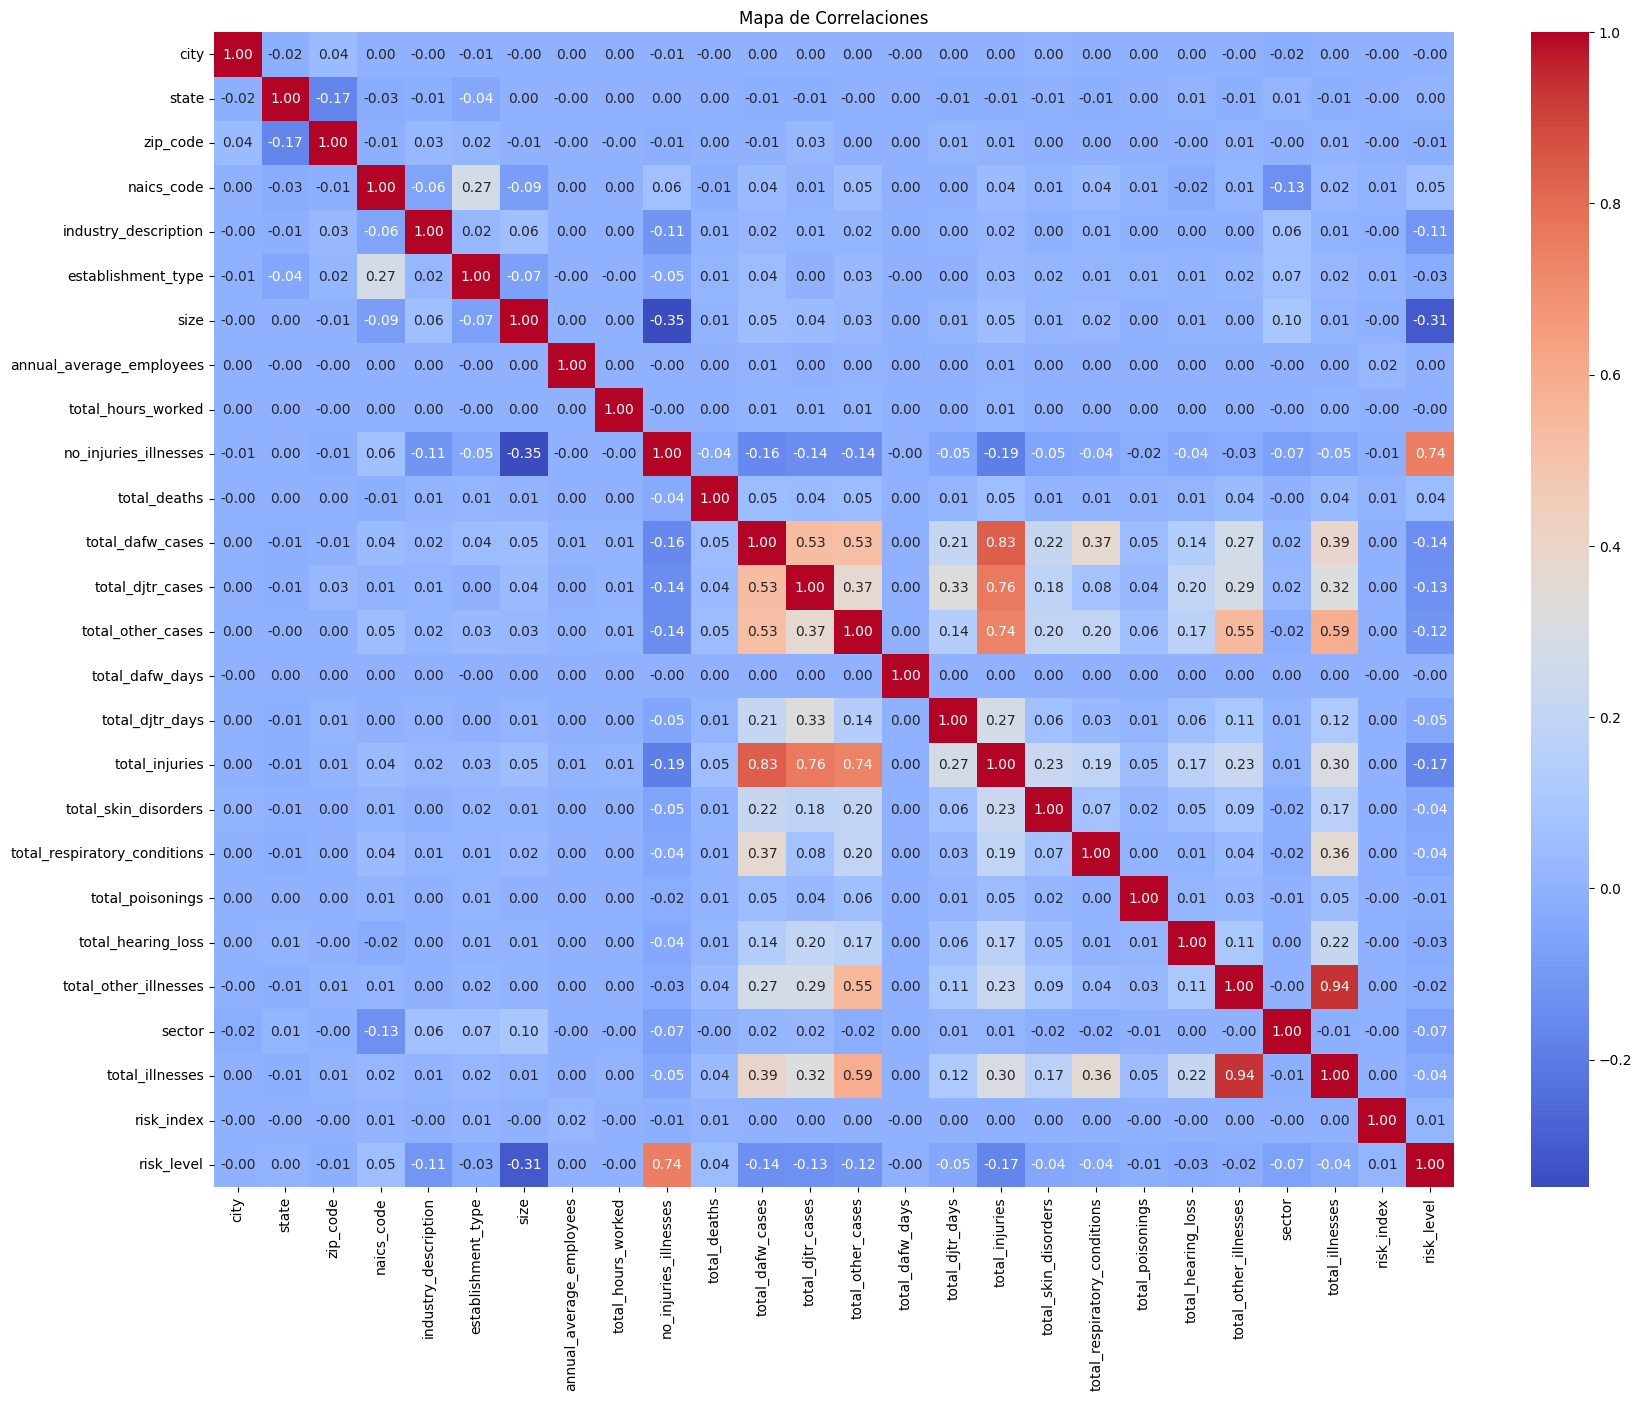

In [36]:
plt.figure(figsize=(20, 15))
sns.heatmap(Dataset_Num.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlaciones")
plt.show()

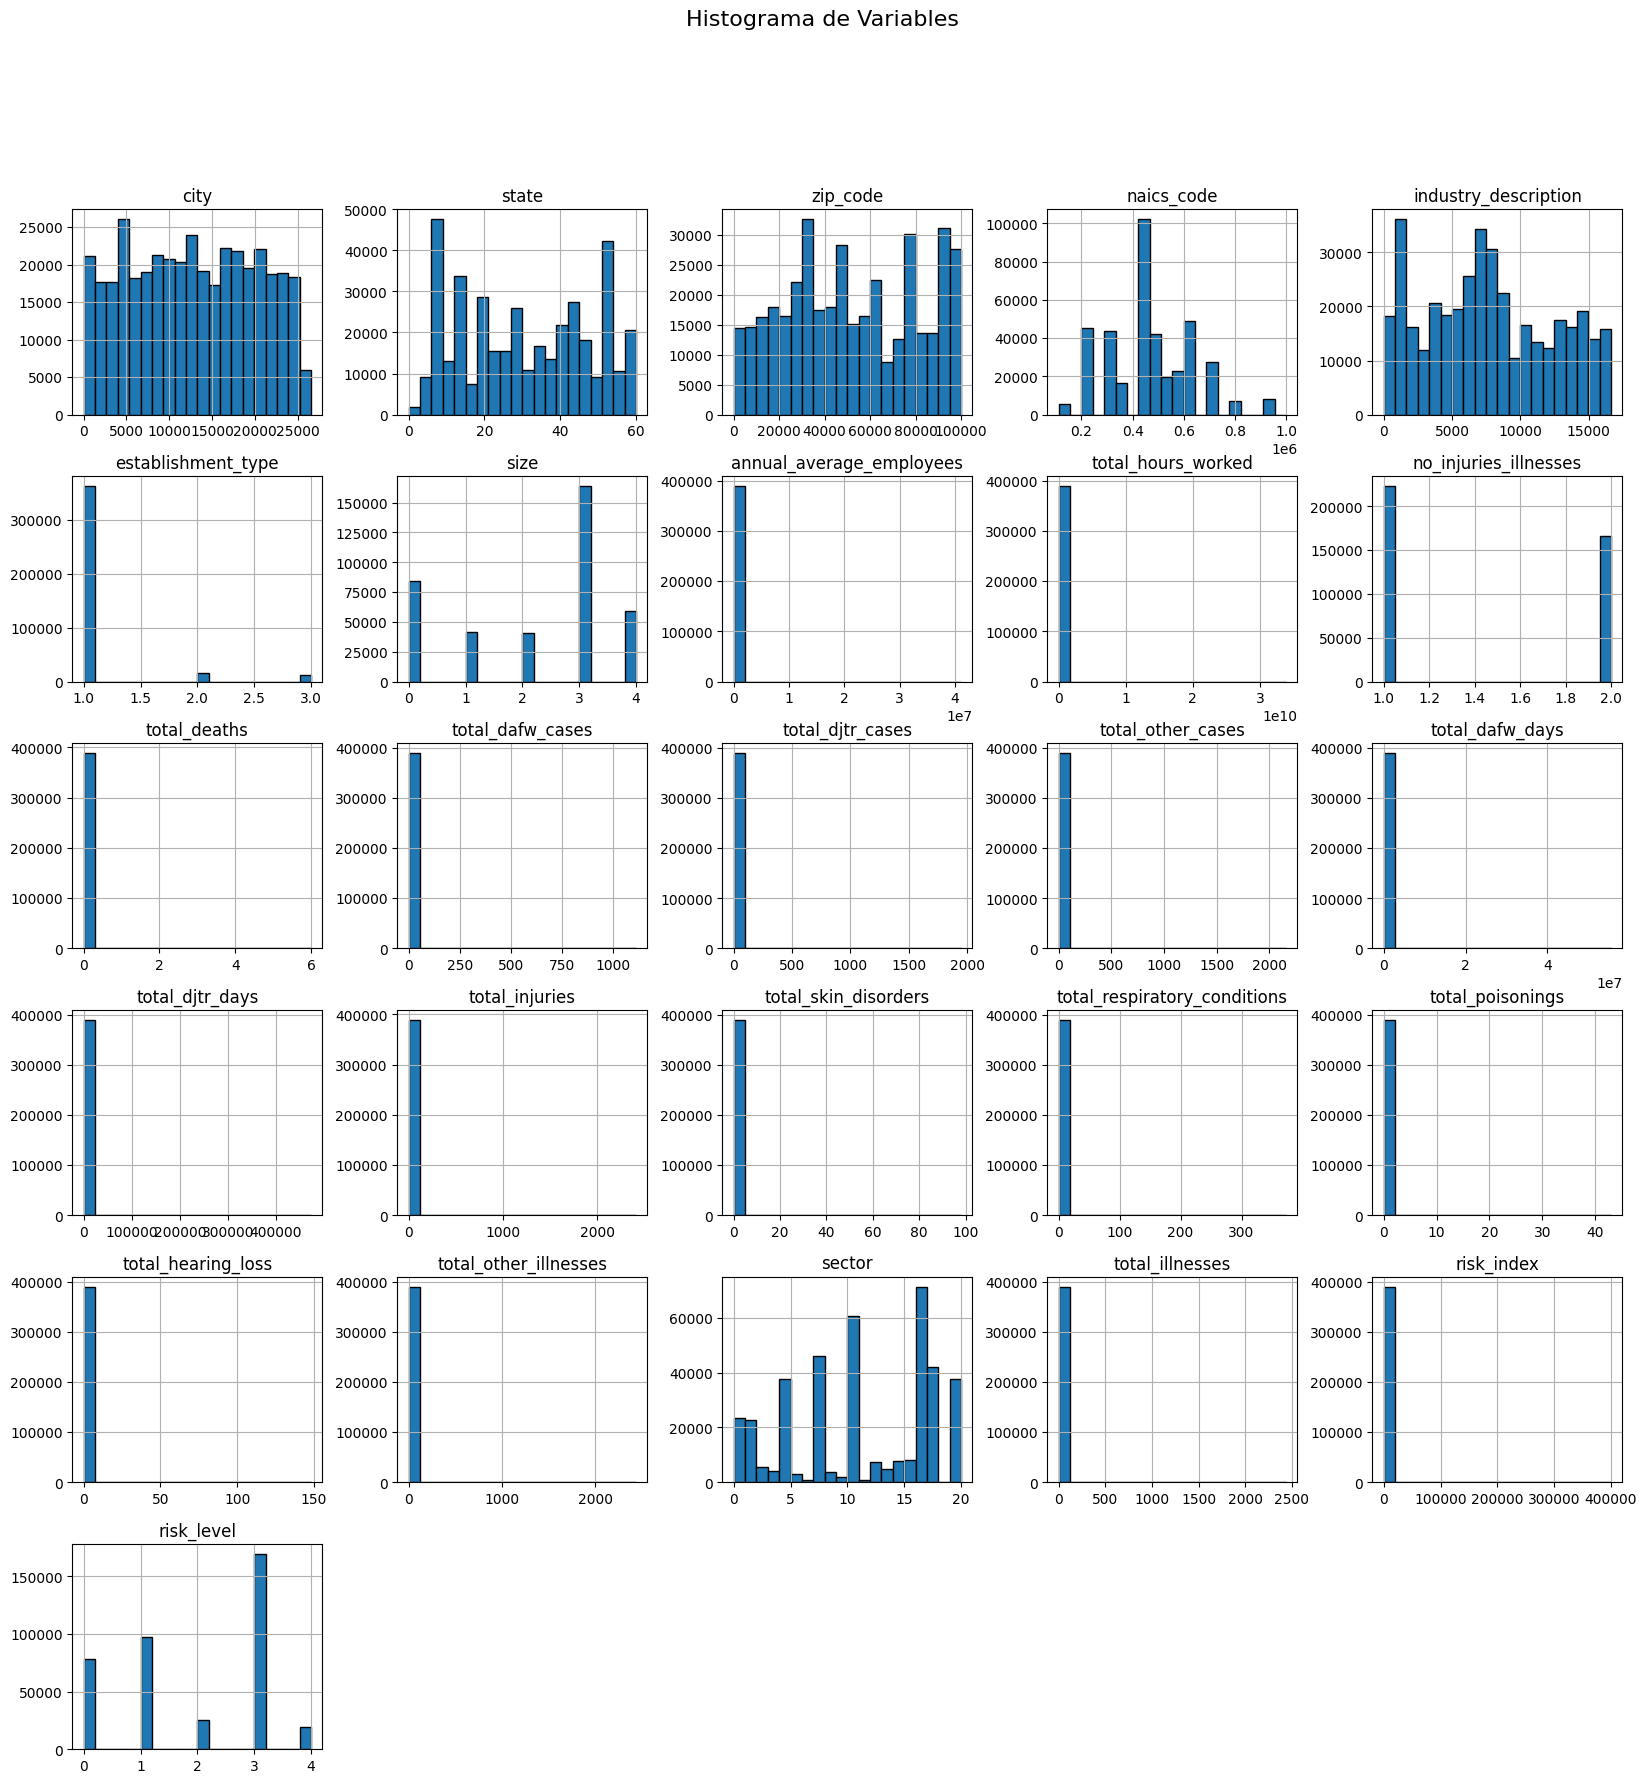

In [37]:
Dataset_Num.hist(figsize=(20, 20), bins=20, edgecolor='black')
plt.suptitle("Histograma de Variables", fontsize=16)
plt.show()

# **Selección y Entrenamiento del Modelo**

## **Random Forrest**

### **Experimento 1**
**Random Forrest Regressor para Regresión**

**Random Forrest Classifier para Clasificación**

**Nota:** Se debe entrenar y ejecutar la evaluación del modelo en orden es decir primero Random Forrest Regressor y luego Random Forrest Classifer.

#### **Random Forrest Regressor: risk_index**

**Target** = 'risk_index'

**Variables** = 'annual_average_employees', 'total_hours_worked', 'total_deaths',  'total_dafw_cases', 'total_djtr_cases', 'total_other_cases' , 'total_illnesses'

**Variables de Contexto** = 'size', 'state', 'sector'

In [38]:
#Copia
Dataset_RFR = Dataset_Index.copy()
RS= 27

Features = ['annual_average_employees', 'total_hours_worked', 'total_deaths', 'total_dafw_cases', 'total_djtr_cases', 'total_other_cases', 'total_illnesses', 'size', 'state','sector']
X = Dataset_RFR[Features]
Y = Dataset_RFR['risk_index']

#Inicializar Diccionario Codificadores
Label_Encoder_RFR = {}

#Label Encoder para Categóricas
for col in ['size', 'state', 'sector']:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col].astype(str))
    Label_Encoder_RFR[col] = le  #Guardar Codificador

#Separar Sets
X_Entrenamiento, X_Prueba, Y_Entrenamiento, Y_Prueba = train_test_split(X,Y, test_size=0.2, random_state=RS)

In [39]:
#Tamaño de los DataSets de Prueba y Entrenamiento
print("X_Entrenamiento:", X_Entrenamiento.shape)
print("X_Prueba:", X_Prueba.shape)
print("Y_Entrenamiento:", Y_Entrenamiento.shape)
print("Y_Prueba:", Y_Prueba.shape)

X_Entrenamiento: (311899, 10)
X_Prueba: (77975, 10)
Y_Entrenamiento: (311899,)
Y_Prueba: (77975,)


In [40]:
#Modelo
Modelo_RFR = RandomForestRegressor(n_estimators=100, random_state=RS)


In [41]:
#Entrenamiento
Modelo_RFR.fit(X_Entrenamiento, Y_Entrenamiento)


RandomForestRegressor(random_state=27)

#### **Random Forrest Classifer: risk_level**

**Target** = 'risk_level'

**Variables** = 'annual_average_employees', 'total_hours_worked', 'total_deaths',  'total_dafw_cases', 'total_djtr_cases', 'total_other_cases' , 'total_illnesses'

**Variables de Contexto** = 'size', 'state', 'sector'

In [48]:
#Copia
Dataset_RFC = Dataset_Index.copy()
RS= 27

Features = ['annual_average_employees', 'total_hours_worked', 'total_deaths', 'total_dafw_cases', 'total_djtr_cases', 'total_other_cases', 'total_illnesses', 'size', 'state','sector']
X = Dataset_RFC[Features]
Y = Dataset_RFC['risk_level']

#Inicializar Diccionario Codificadores
Label_Encoder_RFC = {}

#Label Encoder para Categóricas
for col in ['size', 'state', 'sector']:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col].astype(str))
    Label_Encoder_RFC[col] = le  #Guardar Codificador
#Separar Sets
X_Entrenamiento, X_Prueba, Y_Entrenamiento, Y_Prueba = train_test_split(X,Y, test_size=0.2, random_state=RS)

In [49]:
#Tamaño de los DataSets de Prueba y Entrenamiento
print("X_Entrenamiento:", X_Entrenamiento.shape)
print("X_Prueba:", X_Prueba.shape)
print("Y_Entrenamiento:", Y_Entrenamiento.shape)
print("Y_Prueba:", Y_Prueba.shape)

X_Entrenamiento: (311899, 10)
X_Prueba: (77975, 10)
Y_Entrenamiento: (311899,)
Y_Prueba: (77975,)


In [50]:
#Modelo
Modelo_RFC = RandomForestClassifier(n_estimators=100, random_state=RS)

In [51]:
#Entrenamiento
Modelo_RFC.fit(X_Entrenamiento, Y_Entrenamiento)



RandomForestClassifier(random_state=27)

####**Guardar Archivos para App**

In [52]:


#Guardar Modelos Entrenados

with open('Modelo_RFR.pkl', 'wb') as f:
    pickle.dump(Modelo_RFR, f)

with open('Modelo_RFC.pkl', 'wb') as f:
    pickle.dump(Modelo_RFC, f)

#Guardar Label Encoders
with open('Label_Encoder_RFC.pkl', 'wb') as f:
    pickle.dump(Label_Encoder_RFC, f)

with open('Label_Encoder_RFR.pkl', 'wb') as f:
    pickle.dump(Label_Encoder_RFR, f)

# **Evaluación del Modelo**

## **Random Forrest**

### **Experimento 1**
**Random Forrest Regressor para Regresión**

**Random Forrest Classifier para Clasificación**

#### **Random Forrest Regressor: risk_index**

**Target** = 'risk_index'

**Variables** = 'annual_average_employees', 'total_hours_worked', 'total_deaths',  'total_dafw_cases', 'total_djtr_cases', 'total_other_cases' , 'total_illnesses'

**Variables de Contexto** = 'size', 'state', 'sector'

#####**Predicción**

In [42]:
#Predicciones

#Datos Conocidos
Y_Entrenamiento_Predic = Modelo_RFR.predict(X_Entrenamiento)

#Datos Desconocidos
Y_Predic = Modelo_RFR.predict(X_Prueba)

##### **Gráfica**

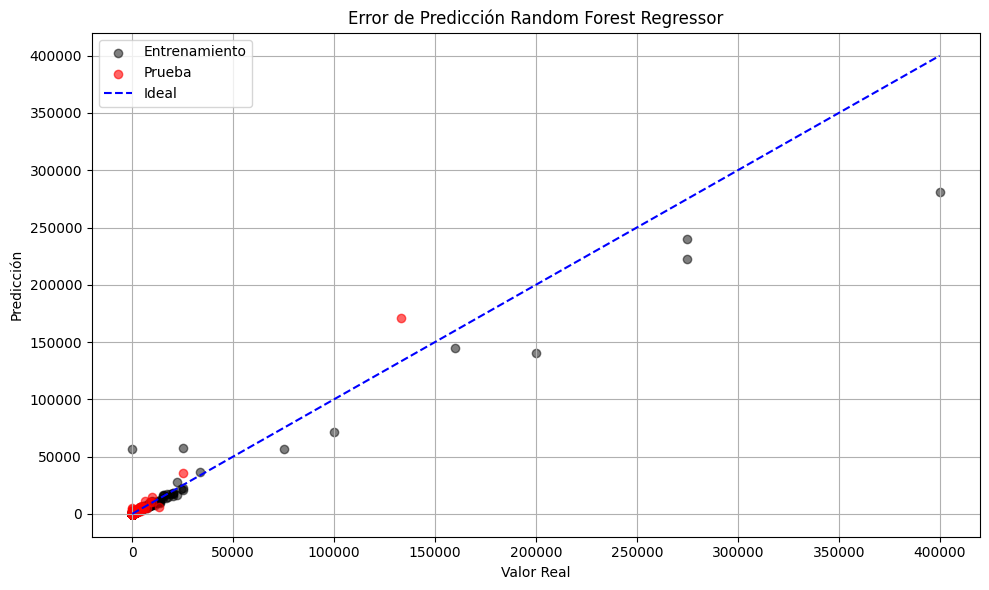

In [43]:
plt.figure(figsize=(10, 6))

#Puntos Entrenamiento
plt.scatter(Y_Entrenamiento, Y_Entrenamiento_Predic, color='black', alpha=0.5, label='Entrenamiento')

#Puntos de Prueba
plt.scatter(Y_Prueba, Y_Predic, color='red', alpha=0.6, label='Prueba')

#Línea de Predicción Perfecta
max_val = max(max(Y_Entrenamiento), max(Y_Prueba), max(Y_Entrenamiento_Predic), max(Y_Predic))
plt.plot([0, max_val], [0, max_val], 'b--', label='Ideal')

#Gráfico
plt.title('Error de Predicción Random Forest Regressor')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#####**Valores Residuales**

In [44]:
Comparacion = {"Real": Y_Prueba, "Predicción": Y_Predic, "Residual": Y_Prueba - Y_Predic}
compare = pd.DataFrame(Comparacion)
compare

,Real,Predicción,Residual
179023,0.000000,0.000000,0.000000
285862,3.489397,3.488460,0.000937
354354,2.735317,2.737634,-0.002317
366304,8.106027,8.106463,-0.000436
63766,0.000000,0.000000,0.000000
...,...,...,...
275187,5.595188,5.595745,-0.000556
272459,0.000000,0.000000,0.000000
308361,0.000000,0.000000,0.000000
155499,12.175819,12.169748,0.006071


In [45]:
#Exportar a CSV
compare.to_csv('Comparacion_RandomForrest_Experimento1_RFR.csv', index=False)

#####**Métricas**

In [46]:
#Función Métricas
def Entrenamiento_Val(Y_Entrenamiento, Y_Entrenamiento_Predic, Y_Prueba, Y_Predic, nombre_modelo):
    scores = {
        nombre_modelo + "_Entrenamiento": {
            "R2": round(r2_score(Y_Entrenamiento, Y_Entrenamiento_Predic),2),
            "mae": round(mean_absolute_error(Y_Entrenamiento, Y_Entrenamiento_Predic),2),
            "mse": round(mean_squared_error(Y_Entrenamiento, Y_Entrenamiento_Predic),2),
            "rmse": round(np.sqrt(mean_squared_error(Y_Entrenamiento, Y_Entrenamiento_Predic)),2)
        },
        nombre_modelo + "_Prueba": {
            "R2": round(r2_score(Y_Prueba, Y_Predic),2),
            "mae": round(mean_absolute_error(Y_Prueba, Y_Predic),2),
            "mse": round(mean_squared_error(Y_Prueba, Y_Predic),2),
            "rmse": round(np.sqrt(mean_squared_error(Y_Prueba, Y_Predic)),2)
        }
    }

    return pd.DataFrame(scores)

#Cálculo Métricas
slr_score = Entrenamiento_Val(Y_Entrenamiento, Y_Entrenamiento_Predic, Y_Prueba, Y_Predic, 'RandomForest')
slr_score


,RandomForest_Entrenamiento,RandomForest_Prueba
R2,0.93,0.91
mae,1.99,1.78
mse,88617.59,22346.96
rmse,297.69,149.49


##### **Análisis Métricas**

##### **R2 Coeficiente de Determinación**
El modelo explica el **91%** de la variabilidad de los datos nuevos, esto indica que el modelo logra predecir muy bien los datos nuevos, explicando el 91% de la varianza del **risk_index**. Esto indica que tiene muy buena capacidad de generalización y un muy buen rendimiento.

En los datos de entrenamiento explica el **93%** lo cual es muy bueno para el conjunto de entrenamiento.

##### **MAE Error Absoluto Medio**
**1.78** indica que las predicciones están a 1.78 unidades del valor real.

Dado que el MAE es bajo tanto en entrenamiento como en prueba se infiere que el modelo tiene un buen ajuste.

##### **MSE Error Cuadrático**
**22,346** en prueba y **88,617**, el MSE en prueba es mas bajo lo que indica mejor desempeño y que el modelo no esta sobreajustado.

##### **RMSE Raíz Cuadrada de MSE**
**149** en prueba significa que en promedio el modelo se equivoca en ±149 unidades.  En entrenamiento es de **297**.
En el contexto de un R2 alto, estos valores indican que los errores de predicción son relativamente pequeños y consistentes.

##### **Conclusión**
Excelente rendimiento (R2)
Bajo sobreajuste (pequeña diferencia R2 prueba vs. entrenamiento)
El risk_index calculado con total_hours_worked es una métrica sólida y el modelo aprende a predecirlo con mucha precisión.

##### **Importancia Features en risk_index**

In [47]:
#Importancia Features
Importancia = Modelo_RFR.feature_importances_

#Serie Pandas
Feature_names = Features

Feature_Importancia = pd.Series(Importancia, index=Feature_names)

#Ordenar Features de > a <
Feature_Importancia = Feature_Importancia.sort_values(ascending=False)

#Mostrar
print("Importancia de Features:")
print(Feature_Importancia)

Importancia de Features:
total_dafw_cases            0.493700
total_other_cases           0.241145
total_hours_worked          0.060807
total_djtr_cases            0.054901
annual_average_employees    0.048648
sector                      0.034359
state                       0.027499
size                        0.025367
total_illnesses             0.013489
total_deaths                0.000084
dtype: float64


#### **Random Forrest Classifier: risk_level**

**Target** = 'risk_level'

**Variables** = 'annual_average_employees', 'total_hours_worked', 'total_deaths',  'total_dafw_cases', 'total_djtr_cases', 'total_other_cases' , 'total_illnesses'

**Variables de Contexto** = 'size', 'state', 'sector'

##### **Predicción**

In [53]:
#Predicciones

#Datos Conocidos
Y_Entrenamiento_Predic = Modelo_RFC.predict(X_Entrenamiento)

#Datos Desconocidos
Y_Predic = Modelo_RFC.predict(X_Prueba)

##### **Gráfica**

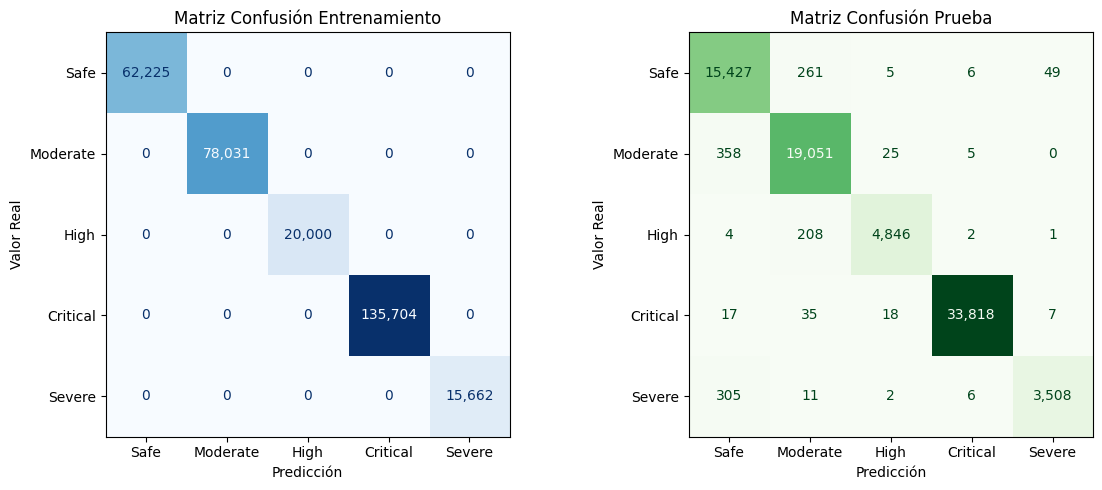

In [55]:
nombres_clases = ['Safe', 'Moderate', 'High', 'Critical', 'Severe']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Matriz Confusión Entrenamiento
Matriz_Entrenamiento = confusion_matrix(Y_Entrenamiento, Y_Entrenamiento_Predic)
disp_train = ConfusionMatrixDisplay(confusion_matrix=Matriz_Entrenamiento, display_labels=nombres_clases)
disp_train.plot(cmap=plt.cm.Blues, ax=axes[0], colorbar=False)
axes[0].set_title("Matriz Confusión Entrenamiento")
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Valor Real')

#Formato Matriz Entrenamiento
for text in disp_train.text_.ravel():
    if text.get_text():
        try:
            val = float(text.get_text())
            text.set_text(format(int(val), ','))
        except ValueError:
            pass

#Matriz Confusión Prueba
Matriz_Prueba = confusion_matrix(Y_Prueba, Y_Predic)
disp_test = ConfusionMatrixDisplay(confusion_matrix=Matriz_Prueba, display_labels=nombres_clases)
disp_test.plot(cmap=plt.cm.Greens, ax=axes[1], colorbar=False)
axes[1].set_title("Matriz Confusión Prueba")
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Valor Real')

#Formato Matriz Prueba
for text in disp_test.text_.ravel():
    if text.get_text():
        try:
            val = float(text.get_text())
            text.set_text(format(int(val), ','))
        except ValueError:
            pass

plt.tight_layout()
plt.show()

##### **Valores Residuales**

In [56]:
# Asegurar que las clases sean listas/series del mismo tamaño
Y_real = pd.Series(Y_Prueba).reset_index(drop=True)
Y_pred = pd.Series(Y_Predic).reset_index(drop=True)

# Comparación
compare = pd.DataFrame({
    "Real": Y_real,
    "Predicción": Y_pred
})

# Residual: 0 si acierta, 1 si falla
compare["Residual"] = (compare["Real"] != compare["Predicción"]).astype(int)

compare

,Real,Predicción,Residual
0,Safe,Safe,0
1,High,High,0
2,High,High,0
3,Critical,Critical,0
4,Safe,Safe,0
...,...,...,...
77970,Critical,Critical,0
77971,Safe,Safe,0
77972,Safe,Safe,0
77973,Critical,Critical,0


In [57]:
#Exportar a CSV
compare.to_csv('Comparacion_RandomForrest_Experimento1_RFC.csv', index=False)

##### **Métricas**

In [58]:
#Función Métricas
def Entrenamiento_Val_Cla(Y_Entrenamiento, Y_Entrenamiento_Predic, Y_Prueba, Y_Predic, Nombre_Modelo):
    scores = {
        Nombre_Modelo + "_Entrenamiento": {
            "Accuracy": round(accuracy_score(Y_Entrenamiento, Y_Entrenamiento_Predic), 2),
            "Precision": round(precision_score(Y_Entrenamiento, Y_Entrenamiento_Predic, average='macro', zero_division=0), 2),
            "Recall": round(recall_score(Y_Entrenamiento, Y_Entrenamiento_Predic, average='macro', zero_division=0), 2),
            "F1-score": round(f1_score(Y_Entrenamiento, Y_Entrenamiento_Predic, average='macro', zero_division=0), 2),
        },
        Nombre_Modelo + "_Prueba": {
            "Accuracy": round(accuracy_score(Y_Prueba, Y_Predic), 2),
            "Precision": round(precision_score(Y_Prueba, Y_Predic, average='macro', zero_division=0), 2),
            "Recall": round(recall_score(Y_Prueba, Y_Predic, average='macro', zero_division=0), 2),
            "F1-score": round(f1_score(Y_Prueba, Y_Predic, average='macro', zero_division=0), 2),
        }
    }
    return pd.DataFrame(scores)

#Calcular Métricas
Metricas_Clasif = Entrenamiento_Val_Cla(Y_Entrenamiento, Y_Entrenamiento_Predic, Y_Prueba, Y_Predic, 'RandomForest')
Metricas_Clasif

,RandomForest_Entrenamiento,RandomForest_Prueba
Accuracy,1.0,0.98
Precision,1.0,0.98
Recall,1.0,0.97
F1-score,1.0,0.97


##### **Análisis Métricas**

##### **Accuracy (Exactitud)**
El modelo en prueba tiene un **98%** lo que significa que el modelo es muy bueno para clasificar los nuevos datos para **risk_level** y en entrenamiento un **100%** lo que indica que no hay error.

##### **Precision (Precisión)**
**98%** en prueba lo que indica que hay muy pocos falsos positivos y un buen manejo del error. en Entrenamiento el **100%** sin falsos positivos.

##### **Recall (Sensibilidad)**
**97%** en prueba y **100%** en entrenamiento lo cual indica que hay una muy buena captura de casos. El modelo es capaz de identificar el 97% de los casos reales de cada nivel de riesgo.

##### **F1 Score**
**97%** en prueba lo que indica que hay un muy buen equilibrio entre precisión y recuperación.  Con el **100%** en entrenamiento el equilibrio es perfecto.

##### **Conclusión**
El modelo aprendió muy bien en los datos de entrenamiento, casi sin errores.

Muy buen desempeño en datos nuevos, la ligera caída es normal y mínima, muestra buena generalización.

La diferencia entre 100% vs 97% o 98% es pequeña pero podría indicar que el modelo estaría levemente sobre-ajustado en entrenamiento; si es así el sobre ajuste es muy leve y no está afectando significativamente la generalización del modelo.
Las métricas de prueba son excepcionalmente buenas.

#####**Importancia Features**

In [59]:
#Importancia Features
Importancia = Modelo_RFC.feature_importances_

#Serie Pandas
Feature_names = Features

Feature_Importancia = pd.Series(Importancia, index=Feature_names)

#Ordenar Features de > a <
Feature_Importancia = Feature_Importancia.sort_values(ascending=False)

#Mostrar
print("Importancia de Featuress:")
print(Feature_Importancia)

Importancia de Featuress:
total_dafw_cases            0.247574
total_other_cases           0.226717
total_djtr_cases            0.196991
total_hours_worked          0.183439
annual_average_employees    0.068920
total_illnesses             0.024765
size                        0.021505
state                       0.013990
sector                      0.012865
total_deaths                0.003233
dtype: float64


**

**Notas:** Se realizaron seis experimentos de regresión lineal utilizando **total_injuries** como variable objetivo, partiendo de un enfoque incremental con las variables más correlacionadas (total_dafw_cases, total_djtr_cases y total_other_cases). Aunque se observaron ciertos patrones, estos modelos mostraban limitaciones para capturar adecuadamente el riesgo de manera contextual y accionable. Por ello, se amplió el análisis incluyendo variables de contexto como size, sector y state, lo que permitió identificar **la necesidad de una métrica más integral**. Como resultado, se decidió reformular el objetivo de predicción y construir **un índice de riesgo (risk_index) y un nivel de riesgo (risk_level)**, que permiten representar de forma más completa la peligrosidad de un entorno laboral, facilitando la interpretación comparativa entre empresas o sectores. Esta reformulación alinea mejor el análisis con objetivos preventivos y de gestión del riesgo, motivo por el cual los experimentos iniciales con total_injuries fueron descartados y no están incluidos en este notebook.